In [1]:
!pip install jovian --upgrade -q
!pip install bar-chart-race -q
!pip install pycountry

<hr style="height:10px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

In [2]:
import jovian
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
import pycountry
import operator
from collections import Counter
import warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

In [3]:
warnings.filterwarnings('ignore')
movies = pd.read_csv('movies_metadata.csv')
pd.options.display.max_columns = 30
pd.set_option('display.float_format', '{:,}'.format) #to display float with commas

<br></br>
A quick look at the data.

In [4]:
movies.set_index('id', inplace=True)
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,,,
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,"373,554,033.0",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,"5,415.0"
8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,"262,797,249.0",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,"2,413.0"
15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [5]:
print(f'Number of rows: {movies.shape[0]}')
print(f'Number of columns: {movies.shape[1]}')

Number of rows: 45466
Number of columns: 23


Cleaning data

In [6]:
movies.drop(movies[movies['adult'] == 'True'].index, axis='rows', inplace=True)
movies.drop(labels = ['adult', 'belongs_to_collection', 'homepage', 'poster_path', 'video'], axis='columns', inplace=True)

<br></br>
We will be working with the remaning columns shown below. As the columns were all over the place, rearranging them with the reindex method makes it look more organized. 

In [7]:
movies.columns
movies = movies.reindex(columns = ['imdb_id','title','original_title','release_date','overview','tagline','genres', 'runtime',
                                   'original_language','spoken_languages','production_companies','production_countries',
                                   'budget', 'revenue','status',  'vote_average','vote_count','popularity',])
movies.head(3)

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

,imdb_id,title,original_title,release_date,overview,tagline,genres,runtime,original_language,spoken_languages,production_companies,production_countries,budget,revenue,status,vote_average,vote_count,popularity
id,,,,,,,,,,,,,,,,,,
862,tt0114709,Toy Story,Toy Story,1995-10-30,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30000000,"373,554,033.0",Released,7.7,"5,415.0",21.946943
8844,tt0113497,Jumanji,Jumanji,1995-12-15,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",65000000,"262,797,249.0",Released,6.9,"2,413.0",17.015539
15602,tt0113228,Grumpier Old Men,Grumpier Old Men,1995-12-22,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0.0,Released,6.5,92.0,11.7129


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

In [8]:
movies[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'original_language', 'revenue']].head(3)

,title,genres,production_companies,production_countries,spoken_languages,original_language,revenue
id,,,,,,,
862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",en,"373,554,033.0"
8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,"262,797,249.0"
15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",en,0.0


In [9]:
import re

regex = re.compile(r": '(.*?)'")
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(regex.findall(x)))

In [10]:
movies[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head(3)

,title,genres,production_companies,production_countries,spoken_languages
id,,,,,
862,Toy Story,"Animation, Comedy, Family","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
8844,Jumanji,"Adventure, Fantasy, Family","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
15602,Grumpier Old Men,"Romance, Comedy","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

In [31]:
print('Number of missing values in revenue: {}'.format(movies['revenue'].isna().sum()))
movies.dropna(subset=['revenue'], inplace=True)
print('Number of missing values in revenue after drop: {}'.format(movies['revenue'].isna().sum()))

Number of missing values in revenue: 4
Number of missing values in revenue after drop: 0


In [32]:
print('Number of duplicate revenue before drop: {}'.format(movies['revenue'].duplicated().sum()))
movies.drop_duplicates('revenue', inplace=True)
print('Number of duplicate revenue remaining: {}'.format(movies['revenue'].duplicated().sum()))

Number of duplicate revenue before drop: 38541
Number of duplicate revenue remaining: 0


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

## Data Exploration and Visualization <a id='C54'></a>

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Top 10 <a id='C60'></a>

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 10 languages in terms of revenue ? <a id='C106'></a>


In [33]:
def get_language(short_code):                                   
    language = pycountry.languages.get(alpha_2=str(short_code))
    if language:
        return language.name
    else:
        return np.nan
top10_lang_rev = movies.groupby('original_language').sum()['revenue'].sort_values(ascending=False)[:10].to_frame()
top10_lang_rev['language'] = top10_lang_rev.index.map(get_language).fillna('Chinese')
top10_lang_rev

,revenue,language
original_language,,
en,"484,565,407,058.0",English
ja,"3,406,920,997.0",Japanese
zh,"2,900,262,298.0",Chinese
fr,"2,602,601,986.0",French
hi,"1,455,424,630.0",Hindi
es,"1,019,473,285.0",Spanish
ko,"849,143,445.0",Korean
cn,"841,525,769.0",Chinese
ru,"698,048,862.0",Russian


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Languages by Revenue')

Text(0.5, 0, 'Language')

Text(0, 0.5, 'Total Revenue')

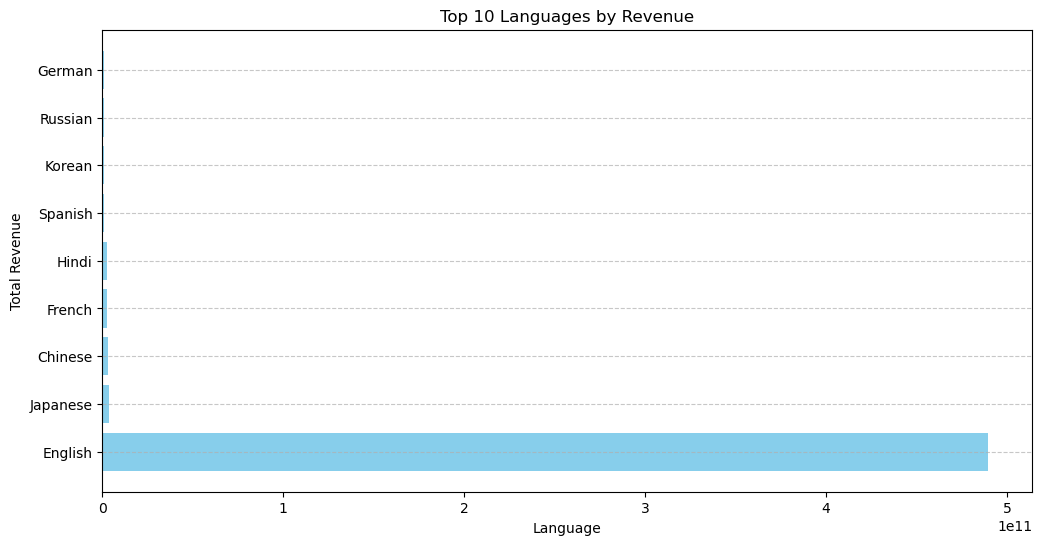

In [27]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))
plt.barh(top10_lang_rev['language'], top10_lang_rev['revenue'], color='skyblue')
plt.title('Top 10 Languages by Revenue')
plt.xlabel('Language')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### Top 10 Movies in Top 10 Languages with the Highest Revenue

In [34]:
cond = (movies.original_language.isin(top10_lang_rev.index)) & (movies.vote_count>100)
title_vote_avg = movies.loc[cond,['title', 'vote_average', 'original_language']]

grouped = title_vote_avg.groupby('original_language')
title_vote_avg['vote_rank'] = grouped['vote_average'].rank(method='first').astype(int)
title_vote_avg['language'] = title_vote_avg['original_language'].apply(get_language).fillna('Chinese')

lang_top10 = title_vote_avg[title_vote_avg['vote_rank']<11]
lang_top10.pivot(['language', 'original_language'], 'vote_rank', 'title')

vote_rank                                              1   \
language original_language                                  
Chinese  cn                            The Accidental Spy   
         zh                                  Dragon Blade   
English  en                             House of the Dead   
French   fr                  Asterix at the Olympic Games   
German   de                           Rabbit Without Ears   
Hindi    hi                                 Kal Ho Naa Ho   
Japanese ja                 Pokémon: Spell of the Unknown   
Korean   ko                            Dragon Wars: D-War   
Russian  ru                                     Day Watch   
Spanish  es                                [REC]³ Genesis   

vote_rank                                                       2   \
language original_language                                           
Chinese  cn                                                    CJ7   
         zh                                        The Grandmaster   
English  en                                      Battlefield Earth   
French   fr                 HOUBA! On the Trail of the Marsupilami   
German   de                                                Phoenix   
Hindi    hi                                           The Lunchbox   
Japanese ja                                Pokémon: The Movie 2000   
Korean   ko                                               The Host   
Russian  ru                       Mongol: The Rise of Genghis Khan   
Spanish  es                                      [REC]⁴ Apocalypse   

vote_rank                                             3   \
language original_language                                 
Chinese  cn                                 Mr. Nice Guy   
         zh                                   Wolf Totem   
English  en                            Alone in the Dark   
French   fr                                         Lolo   
German   de                              Goodnight Mommy   
Hindi    hi                             Taare Zameen Par   
Japanese ja                 Space Pirate Captain Harlock   
Korean   ko                                  Snowpiercer   
Russian  ru                                  Russian Ark   
Spanish  es                                   Aftershock   

vote_rank                                                                  4   \
language original_language                                                      
Chinese  cn                                               Rumble in the Bronx   
         zh                 Detective Dee and the Mystery of the Phantom F...   
English  en                                                    Disaster Movie   
French   fr                                   On the Other Side of the Tracks   
German   de                                                 Fuck You Goethe 2   
Hindi    hi                                                   My Name Is Khan   
Japanese ja                                               Tales from Earthsea   
Korean   ko                                       I'm a Cyborg, But That's OK   
Russian  ru                                               Battleship Potemkin   
Spanish  es                                                          Bandidas   

vote_rank                                              5   \
language original_language                                  
Chinese  cn                                  First Strike   
         zh                                  The Assassin   
English  en                                    FearDotCom   
French   fr                                        Taxi 3   
German   de                               Look Who's Back   
Hindi    hi                             Bajrangi Bhaijaan   
Japanese ja                 Dragon Ball Z: Battle of Gods   
Korean   ko                    Sympathy for Mr. Vengeance   
Russian  ru                                           NaN   
Spanish  es                               I'm So Excited!   


#### Genres of these movies

In [35]:
import pandas as pd


movies1 = pd.read_csv('Book1.csv', encoding='latin-1')


print(movies1[['title', 'genres', 'language']].to_string(index=False))

                                 title                                                    genres language
                    The Accidental Spy                                  Action, Comedy, Thriller  Chinese
                        Chinese Zodiac                                         Action, Adventure  Chinese
                                   CJ7                                     Comedy, Drama, Family  Chinese
                          Mr. Nicw Guy                                     Crime, Action, Comedy  Chinese
                         Game of Death                            Drama, Action, Thriller, Crime  Chinese
                               The Eye                                    Drama,Horror, Thriller  Chinese
                   Rumble in the Bronx                            Crime, Action, Comedy,Thriller  Chinese
                          First Strike            Action,Adventure,Comedy, Crime, Drama,Thriller  Chinese
                               Shaolin        

#### Most Popular Genres in the specific language. 

In [36]:

most_common_genre_per_language = movies1.groupby('language')['genres'].apply(lambda x: x.mode().iloc[0])


print(most_common_genre_per_language)


language
Chinese                       Action, Adventure
English               Action, Adventure, Comedy
French                                   Comedy
German                                   Comedy
Hindi                             Comedy, Drama
Japanese             Action, Animation, Fantasy
Korean      Action, Adventure, Comedy, Western 
Russian        Action, Science Fiction, Fantasy
Spanish                        Thriller, Horror
Name: genres, dtype: object


<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>